In [1]:
#Tuon tarvittavat kirjastot:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

<h2>Datan avaaminen, dataan tutustuminen ja datan valmistelu</h2>

<ul><li><b>head()</b> ja <b>tail()</b> näyttävät data ensimmäisiä rivejä ja viimeisiä rivejä. Sulkuihin voin lisätä näytettävien rivien lukumäärän (oletus on viisi riviä).</li>
    <li><b>columns</b> näyttää sarakkeiden (muuttujien) nimet.</li>
    <li><b>count()</b> näyttää muuttujien arvojen lukumäärät.</li>
    <li><b>np.unique()</b> näyttää muuttujien ainutkertaiset arvot.</li>
    <li>Jos muuttujien numeroarvoilla on sanalliset nimet, niin ne kannattaa määritellä listoiksi. Listat on myöhemmin helppo sijoittaa tulostaulukoihin.</li>
    <li><b>replace()</b>-funktiolla voin korvata muuttujien arvoja toisilla arvoilla.</li>
    <li><b>rename()</b>-funktiolla voin nimetä muuttujia uudelleen.</li>

In [2]:
#Avaan Excel-datan dataframeen ja näytän viisi ensimmäistä riviä.
#Vanhemmissa pandas-versioissa 'sheet_name sijasta' täytyy käyttää 'sheetname'.
df = pd.read_excel('http://taanila.fi/data1.xlsx', sheet_name = 'Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
#Datan viisi viimeistä riviä:
df.tail()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [4]:
#Datan sarakkeet (muuttujat):
df.columns

Index(['nro', 'sukup', 'ikä', 'perhe', 'koulutus', 'palveluv', 'palkka',
       'johto', 'työtov', 'työymp', 'palkkat', 'työteht', 'työterv', 'lomaosa',
       'kuntosa', 'hieroja'],
      dtype='object')

In [5]:
#Arvojen lukumäärät sarakkeissa:
df.count()

nro         82
sukup       82
ikä         82
perhe       82
koulutus    81
palveluv    80
palkka      82
johto       82
työtov      81
työymp      82
palkkat     82
työteht     82
työterv     47
lomaosa     20
kuntosa      9
hieroja     22
dtype: int64

In [6]:
#Ainutkertaiset arvot sarakkeissa (myös puuttuvien arvojen lukumäärät selviävät tästä):
for var in df:
    print(var, np.unique(df[var]))

nro [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82]
sukup [1 2]
ikä [20 21 22 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 49 50 51 52 53 55 56 58 59 61]
perhe [1 2]
koulutus [ 1.  2.  3.  4. nan]
palveluv [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 27. 28. 35. 36. nan nan]
palkka [1521 1559 1598 1638 1715 1872 1910 1949 1989 2027 2066 2106 2144 2183
 2223 2261 2300 2340 2417 2457 2495 2534 2574 2612 2651 2691 2729 2768
 2808 2846 2925 2963 3119 3393 3470 3510 3587 4446 4874 5069 5225 6278]
johto [1 2 3 4 5]
työtov [ 2.  3.  4.  5. nan]
työymp [1 2 3 4 5]
palkkat [1 2 3 4 5]
työteht [1 2 3 4 5]
työterv [ 1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

In [7]:
#Näitä listoja hyödynnän taulukoiden ja kuvioiden viimeistelyssä.
#Datassa arvot ovat numeroina.
koulutus = ['Peruskoulu', '2. aste', 'Korkeakoulu', 'Ylempi korkeakoulu']
perhe = ['Perheetön', 'Perheellinen']
sukup = ['Mies', 'Nainen']
tyytyväisyys = ['Erittäin tyytymätön', 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 
                'Jokseenkin tyytyväinen', 'Erittäin tyytyväinen']

In [8]:
#Voin tehdä uusia muuttujia uudelleen koodaamalla olemassa olevia:
df['sukup2']=df['sukup'].replace({1 : 'Mies', 2 : 'Nainen'})
df.head(6)

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,sukup2
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Mies
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,Mies
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Mies
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Mies
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,Mies
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN,Nainen


In [9]:
#Tarvittaessa voin vaihtaa muuttujien nimiä.
#Muuttujien nimien vaihtaminen tarpeen varsinkin jos alkuperäiset nimet pitkiä.
df.rename(columns = {'sukup2': 'sukup_teksti', 'ikä2': 'ikäluokka'}, inplace = True)
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,sukup_teksti
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,Mies
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,Mies
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,Mies
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,Mies
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,Mies


<h2>Lukumääriä ja prosentteja</h2>

<ul><li>Frekvenssitaulukot ja ristiintaulukoinnit saan yleensä helpoimmin <b>crosstab</b>-funktiolla.</li>
    <li>Monivalintojen lukumäärät lasken <b>count</b>-funktiolla.</li>
    <li>Useamman mielipideasteikollisen muuttujan yhteenveto samaan taulukkoon onnistuu 
        <b>value_counts</b>-funktiolla.</li>
    <li>Kaavioiksi sopii vaakapylväät (<b>barh</b>) ja pystypylväät (<b>bar</b>)</li></ul>

In [10]:
#crosstab() sopii lukumäärien laskemiseen:
df1 = pd.crosstab(df['koulutus'], 'n')

#Korvaan riviotsikot aiemmin määritellyllä koulutus-listalla:
df1.index = koulutus

#Poistan vasemmasta yläkulmasta häiritsevän otsikon
df1.columns.name = ''

df1

,n
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [11]:
#Lasken prosentit:
df1['%'] = df1/df1.sum()*100

#Muotoilen prosentit yhden desimaalin tarkkuuteen.
#Suomen kielessä lukuarvon ja prosenttimerkin välissä on välilyönti.
df1.style.format({'%': '{:.1f} %'})

,n,%
Peruskoulu,27,33.3 %
2. aste,30,37.0 %
Korkeakoulu,22,27.2 %
Ylempi korkeakoulu,2,2.5 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

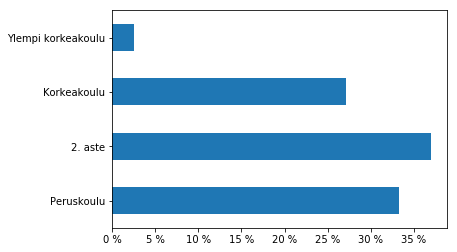

In [12]:
#Pylväskuvio, jonka pylväiden väri on käytössä olevan teeman ensimmäinen väri C0).
#color = 'C0' määritystä ei tarvita kaikissa Pandas/Matplotlib-versioisssa.
ax1 = df1['%'].plot.barh(color = 'C0')

#Asteikon esittäminen prosentteina on hivenen konstikasta:
ax1.set_xticklabels(['{:.0f} %'.format(x) for x in ax1.get_xticks()])

In [13]:
#Monivalintojen lukumäärät selviävät count()-funktiolla:
df2=df[['työterv', 'lomaosa', 'kuntosa', 'hieroja']].count()

#Muutan series-tyyppisen listan dataframeksi ja samalla järjestän lukumäärien mukaiseen järjestykseen:
df2 = df2.to_frame('n').sort_values(by = 'n', ascending = False)

#Esitän ilman desimaaleja:
df2.style.format('{:.0f}')

,n
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


Text(0.5, 0, 'Käyttäjien lukumäärä')

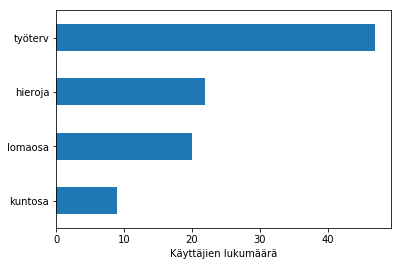

In [14]:
#Edellinen pylväinä
ax2 = df2.sort_values(by = 'n').plot.barh(legend = False, color = 'C0')

ax2.set_xlabel('Käyttäjien lukumäärä')

In [15]:
#Monivalinnat sukupuolen mukaan:
df3 = df.groupby('sukup')['työterv', 'lomaosa', 'kuntosa', 'hieroja'].count()

#Sukupuolet sukup-listasta, joka määriteltiin aikaisemmin:
df3.index = sukup

#Loppusilaus:
df3.style.format('{:.0f}')

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


Text(0.5, 0, 'Käyttäjien lukumäärä')

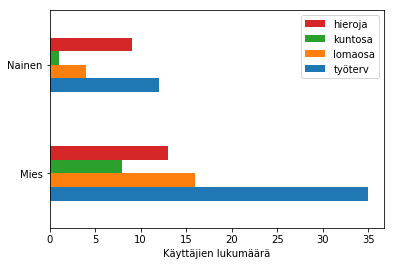

In [16]:
#Edellinen pylväinä; 'reverse' kääntää selitteen järjestyksen
ax3 = df3.plot.barh(legend='reverse')

ax3.set_xlabel('Käyttäjien lukumäärä')

In [17]:
#Ristiintaulukoinnit crosstab-toiminnolla, prosentit sarakkeiden mukaan:
df4 = pd.crosstab(df['koulutus'], df['sukup'], normalize = 'columns')

#Rivi (index) ja sarake (columns) -otsikot koulutus- ja sukup-listoista:
df4.index = koulutus
df4.columns = sukup

#Tässä on ylimääräistä kikkailua, koska suomen kielessä välilyönti ennen %-merkkiä:
(df4*100).style.format('{:.1f} %')

,Mies,Nainen
Peruskoulu,35.5 %,26.3 %
2. aste,37.1 %,36.8 %
Korkeakoulu,24.2 %,36.8 %
Ylempi korkeakoulu,3.2 %,0.0 %


[Text(0, 0, '0 %'),
 Text(0, 0, '5 %'),
 Text(0, 0, '10 %'),
 Text(0, 0, '15 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '25 %'),
 Text(0, 0, '30 %'),
 Text(0, 0, '35 %'),
 Text(0, 0, '40 %')]

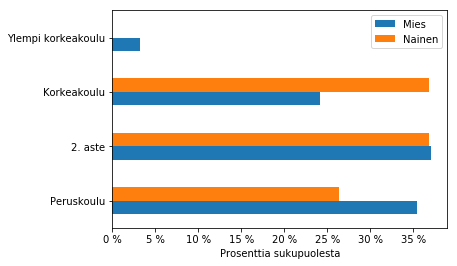

In [18]:
#Edellinen pylväinä
ax4 = df4.plot.barh()

ax4.set_xlabel('Prosenttia sukupuolesta')

#Tässä on ylimääräistä kikkailua, koska suomen kielessä välilyönti ennen %-merkkiä:
ax4.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax4.get_xticks()])

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

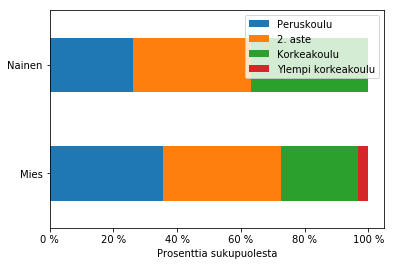

In [19]:
#Edellinen 100 % pinottuina vaakapylväinä. T vaihtaa arvosarjat ja kategoriat päittäin.
ax5 = df4.T.plot.barh(stacked = True)

ax5.set_xlabel('Prosenttia sukupuolesta')

#Tässä on ylimääräistä kikkailua, koska suomen kielessä välilyönti ennen %-merkkiä:
ax5.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax5.get_xticks()])

In [20]:
#Lasken lukumääriä value_counts()-funktiolla ja muutan tuloksen dataframeksi.
#'normalize=True' esittää lukumäärät prosentteina.
df5 = df['johto'].value_counts(sort = False, normalize = True).to_frame()

#Lisään dataframeen uusia sarakkeita:
df5['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df5['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df5['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df5['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)

#Riviotsikot aiemmin määritellystä tyytyväisyys-listasta:
df5.index = tyytyväisyys

#Tässä on ylimääräistä kikkailua, koska suomen kielessä välilyönti ennen %-merkkiä:
(df5*100).style.format('{:.1f} %')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5 %,nan %,11.0 %,40.2 %,6.1 %
Jokseenkin tyytymätön,19.5 %,3.7 %,11.0 %,23.2 %,18.3 %
Ei tyytymätön eikä tyytyväinen,36.6 %,19.8 %,36.6 %,23.2 %,35.4 %
Jokseenkin tyytyväinen,28.0 %,43.2 %,28.0 %,12.2 %,30.5 %
Erittäin tyytyväinen,7.3 %,33.3 %,13.4 %,1.2 %,9.8 %


Seuraavassa määriteltävistä väreistä lisätietoa https://htmlcolorcodes.com/

Voit määrittää värit käyttäen värien nimiä tai hex-värikoodeja.

[Text(0, 0, '0 %'),
 Text(0, 0, '20 %'),
 Text(0, 0, '40 %'),
 Text(0, 0, '60 %'),
 Text(0, 0, '80 %'),
 Text(0, 0, '100 %'),
 Text(0, 0, '120 %')]

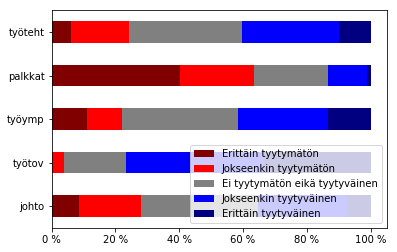

In [21]:
#Edellinen 100 % pinottuina pylväinä; värit voin itse määritellä.
ax6 = df5.transpose().plot.barh(stacked = True, 
                               color=['maroon','red','gray','blue','navy'])

#Tässä on ylimääräistä kikkailua, koska suomen kielessä välilyönti ennen %-merkkiä:
ax6.set_xticklabels(['{:.0f} %'.format(x*100) for x in ax6.get_xticks()])

<h2>Luokiteltu jakauma</h2>

<ul><li>Tallennan luokat dataan pandas-kirjaston <b>cut</b>-funktiolla. Parametrina annan luokkien rajakohdat
    (<b>bins</b>) tai luokkien lukumäärän.</li>
    <li>Histogrammin voin tehdä suoraan luokittelemattomasta datasta <b>hist</b>-funktiolla.
        Tässäkin annan luokkien rajakohdat (<b>bins</b>) tai luokkien lukumäärän.</li></ul>

In [22]:
#Määrittelen luokkarajat palkan luokittelemiseksi:
bins = [1000, 2000, 3000, 4000, 7000]

#Lisään aineistoon ikäluokka-sarakkeen:
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

#Palkkaluokkiin kuuluvien lukumäärät:
df6 = pd.crosstab(df['palkkaluokka'], 'n')
df6.columns.name = ''
df6

,n
palkkaluokka,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 7000]",5


Text(0, 0.5, 'Lukumäärä')

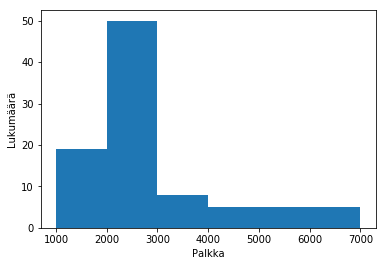

In [23]:
#Palkan luokittelu histogrammina:
ax7 = df['palkka'].plot.hist(bins)

ax7.set_xlabel('Palkka')
ax7.set_ylabel('Lukumäärä')

<h2>Tilastolliset tunnusluvut</h2>

<ul><li>Keskeiset tunnusluvut <b>describe()</b>-funktiolla.</li>
    <li><b>pivot_table()</b> laskee oletuksena keskiarvot, mutta lisäparametreilla voin määrittää muitakin
        tunnuslukuja laskettaviksi.</li>
    <li>Ruutu- ja janakaavio eli <b>boxplot</b> havainnollistaa hyvin viiden luvun yhteenvedon
        (pienin, alaneljännes, mediaani, yläneljännes, suurin).</li></ul>

In [24]:
#Tunnuslukuja kahden desimaalin tarkkuudella:
df[['ikä', 'palveluv', 'palkka', 'johto', 'työtov', 
    'työymp', 'palkkat', 'työteht']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka,johto,työtov,työymp,palkkat,työteht
count,82.00,80.00,82.00,82.00,81.00,82.00,82.00,82.00
mean,37.95,12.18,2563.88,3.06,4.06,3.22,2.11,3.20
std,9.77,8.81,849.35,1.06,0.83,1.15,1.11,1.05
min,20.00,0.00,1521.00,1.00,2.00,1.00,1.00,1.00
25%,31.00,3.75,2027.00,2.00,4.00,3.00,1.00,3.00
50%,37.50,12.50,2320.00,3.00,4.00,3.00,2.00,3.00
75%,44.00,18.25,2808.00,4.00,5.00,4.00,3.00,4.00
max,61.00,36.00,6278.00,5.00,5.00,5.00,5.00,5.00


In [25]:
#pivot_table tuottaa oletuksena keskiarvoja:
df7 = df.pivot_table(values = 'palkka', index = ['sukup', 'perhe'], columns = 'koulutus')

df7.style.format('{:.0f}')

In [26]:
#Hierarkisen indeksin arvot aiemmin määritellyistä sukup- ja perhe-listoista
df7.index = df7.index.set_levels(sukup, level=0)
df7.index = df7.index.set_levels(perhe, level=1)
df7.columns = koulutus

df7.style.format('{:.0f}')

In [27]:
#pivot-taulukossa voi käyttää monenlaisia funktioita:
df8 = df.pivot_table(values = 'palkka', index = 'koulutus', aggfunc = [np.min, np.median, np.mean, np.max])

df8.index = koulutus
df8.columns = ['pienin', 'mediaani', 'keskiarvo', 'suurin']

df8.style.format('{:.0f}')

,pienin,mediaani,keskiarvo,suurin
Peruskoulu,1638,2144,2310,3587
2. aste,1521,2378,2403,3510
Korkeakoulu,1559,2710,2887,6278
Ylempi korkeakoulu,5069,5147,5147,5225


[Text(0, 0, 'Peruskoulu'),
 Text(0, 0, '2. aste'),
 Text(0, 0, 'Korkeakoulu'),
 Text(0, 0, 'Ylempi korkeakoulu')]

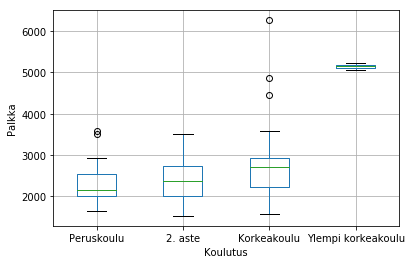

In [28]:
#Ruutu- ja janakaavio on kätevä jakaumien vertailussa
ax8 = df.boxplot('palkka', by = 'koulutus')

#boxplot tuottaa otsikoita, jotka poistan
ax8.set_title('')
ax8.get_figure().suptitle('')

ax8.set_xlabel('Koulutus')
ax8.set_ylabel('Palkka')
ax8.set_xticklabels(koulutus)

<h2>Korrelaatio</h2>

<ul><li>Korrelaatiokertoimet <b>corr()</b>-funktiolla</li>
    <li>Visuaalinen tarkastelu <b>scatter</b>-kaaviolla</li></ul>

In [29]:
#Korrelaatiokertoimia kahden desimaalin tarkkuudella:
df[['ikä', 'palveluv', 'palkka']].corr().style.format('{:.2f}')

,ikä,palveluv,palkka
ikä,1.00,0.53,0.30
palveluv,0.53,1.00,0.24
palkka,0.30,0.24,1.00


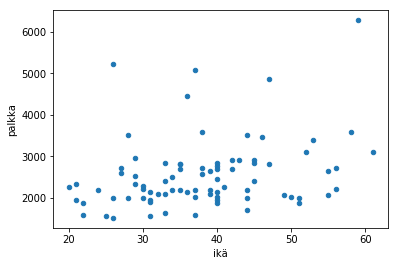

In [30]:
#Iän ja palkan riippuvuus hajontakaaviona:
df.plot.scatter('ikä', 'palkka')